<b><font size ="+2"><div style="text-align: right">FIT1043 Introduction to Data Science </div><font></b>
<b><font size ="+1"><div style="text-align: right">Assignment 2 </div><font></b>
<br>
<div style="text-align: right">Ng Wei Han</div>
<div style="text-align: right">30883490</div>
<hr>

# Introduction 
This assignment contains 1 dataset which consists of data regarding vehicles from around year 2000. In this report, multiple operation has been carried out such as wrangling, read and write data to file, clustering, classification and analysis. 

The following shows the contents of the report: 
1. Introduction
2. Import Libraries
3. Reading CSV File 
4. Data Wrangling 
5. Clustering
6. Classification
7. Conclusion

# Importing Libraries
Import the necessary libraries to assist in data collection, data analysis, data visualization and modelling. The "magic function" matplotlib inline is also included to improve data visualization. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
%matplotlib inline

# Reading CSV File
Using function *.read_csv()* from pandas library, dataframes are created for each CSV files.

In [2]:
df = pd.read_csv('FIT1043-vehicle-classifier.csv')
df_cls = pd.read_csv('FIT1043-kaggle-train-data.csv')
df_cls_test = pd.read_csv('FIT1043-kaggle-test-data.csv')

# Data Wrangling 
Before training a model, data wrangling needs to be carried out so that the dataset is completely ready. This reduces the chances of getting error and exponentially increase model accuracy. Data understanding is also carried out which uses functions such as *.shape*, *.columns* and *.describe()*.

In [3]:
df.shape

(156, 14)

There are **156 rows** and **14 columns** in this dataset.

In [4]:
df.columns

Index(['Manufacturer', 'Model', 'Vehicle_class', 'Vehicle_alt_class',
       'US_vehicle_type', 'Engine_size (litres)', 'Horsepower', 'Wheelbase',
       'Width', 'Length', 'Height', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency'],
      dtype='object')

List of columns are shown above

In [5]:
# Describing continuous data
df.describe()

,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,3.060897,185.948718,107.499359,71.133974,187.301923,59.187179,3.378026,17.951923,23.844156
std,1.044653,56.700321,7.638996,3.415326,13.402491,7.922412,0.630502,3.887921,4.282706
min,1.000000,55.000000,92.600000,62.600000,149.400000,47.000000,1.895000,10.300000,15.000000
25%,2.300000,149.500000,103.000000,68.500000,177.575000,54.775000,2.971000,15.800000,21.000000
50%,3.000000,177.500000,107.000000,70.550000,187.900000,56.200000,3.342000,17.200000,24.000000
75%,3.575000,215.000000,112.200000,73.175000,196.125000,64.525000,3.799500,19.575000,26.000000
max,8.000000,450.000000,138.700000,79.900000,224.500000,104.500000,5.572000,32.000000,45.000000


Highlights:

* Vehicles have an average height of **59.2 inches**.
* The difference of smallest engine size and biggest engine size is **7 litres**.
* The difference of lowest fuel efficiency and highest fuel efficiency is **30 litres**.

In [6]:
# Describing discrete data
df[['Manufacturer','Model','Vehicle_class','Vehicle_alt_class','US_vehicle_type']].describe()

,Manufacturer,Model,Vehicle_class,Vehicle_alt_class,US_vehicle_type
count,156,156,156,23,156
unique,30,155,5,3,2
top,Dodge,Neon,Sedan,Sports,Passenger
freq,11,2,88,18,116


Highlights:

* There are 5 unique vehicle classes. 
* There are 3 unique vehicle additional classes 
* There are only 2 unique US vehicle types. 

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum() 

Vehicle_alt_class    133
Curb_weight            1
Fuel_efficiency        2
dtype: int64

As shown as data above, there are **133 missing values** in 'Vehicle_alt_class' column, **1 missing value** in 'Curb_weight' column and **2 missing values** in 'Fuel_efficiency' column. 

In [8]:
df['Vehicle_class'].unique()

array(['Coupe', 'Sedan', 'SUV', 'Truck', 'MPV'], dtype=object)

In [9]:
fill_alt_class = df.groupby(['Vehicle_alt_class','Vehicle_class'])['Vehicle_class'].count()
fill_alt_class

Vehicle_alt_class  Vehicle_class
Hatch              Sedan             4
SUV                MPV               1
Sports             Coupe            18
Name: Vehicle_class, dtype: int64

The following *groupby()* function helps to see which vehicle class corresponds to which vehicle additional class.

In [10]:
df['Vehicle_alt_class'] = np.where(df['Vehicle_class'] == 'Sedan',df['Vehicle_alt_class'].fillna('Hatch'),df['Vehicle_alt_class'])
df['Vehicle_alt_class'] = np.where(df['Vehicle_class'] == 'MPV',df['Vehicle_alt_class'].fillna('SUV'),df['Vehicle_alt_class'])
df['Vehicle_alt_class'] = np.where(df['Vehicle_class'] == 'Coupe',df['Vehicle_alt_class'].fillna('Sports'),df['Vehicle_alt_class'])
df['Vehicle_alt_class'] = np.where(df['Vehicle_class'] == 'SUV',df['Vehicle_alt_class'].fillna('SUV'),df['Vehicle_alt_class'])
df['Vehicle_alt_class'] = np.where(df['Vehicle_class'] == 'Truck',df['Vehicle_alt_class'].fillna('Cargo'),df['Vehicle_alt_class'])

The codes above filled the empty values in "Vehicle_alt_class" columns. The following additional classification be shown at the table below:

| Vehicle_class| Vehicle_alt_class   |
|------|------|
|   Sedan  | Hatch|
|MPV|SUV|
|Coupe| Sports|
|SUV| SUV|
|Truck| Cargo|

In [11]:
df.dropna(subset = ['Curb_weight','Fuel_efficiency'],inplace = True)
df_cls.dropna(subset = ['Curb_weight'],inplace = True)

In the main dataset, the rows which have empty values have been removed. For the dataset to be used to predict vehicle class, only the rows which have empty values in 'Curb_weight' column have been removed because 'Fuel_efficiency' column is not used in that section.

In [12]:
df_clus = df.drop(columns=['Vehicle_class','Vehicle_alt_class','US_vehicle_type'])
df_clus.shape

(153, 11)

Since 'Vehicle_class', 'Vehicle_alt_class' and 'US_vehicle_type' columns are not used in clustering, they can be removed. The dataset for clustering has **153 rows** and **11 columns**.

# Clustering 
Clustering is a type of **unsupervised learning** method. Clustering divides the data points into a number of groups such that the points in the same groups have more similarities than other groups. Basically, it is finding structure in uncategorised data. In this section, we will be using K-means clustering algorithm.

## What is Unsupervised Learning? 
Unsupervised learning is a type of machine learning algorithm used to draw patterns from datasets consisting of input data which is unlabelled. Unlike supervised learning, the unsupervised learning model needs to work on its own to discover information. Although unsupervised learning can be more unpredictable, it allows algorithms to perform more complex processing tasks compared to supervised learning. 

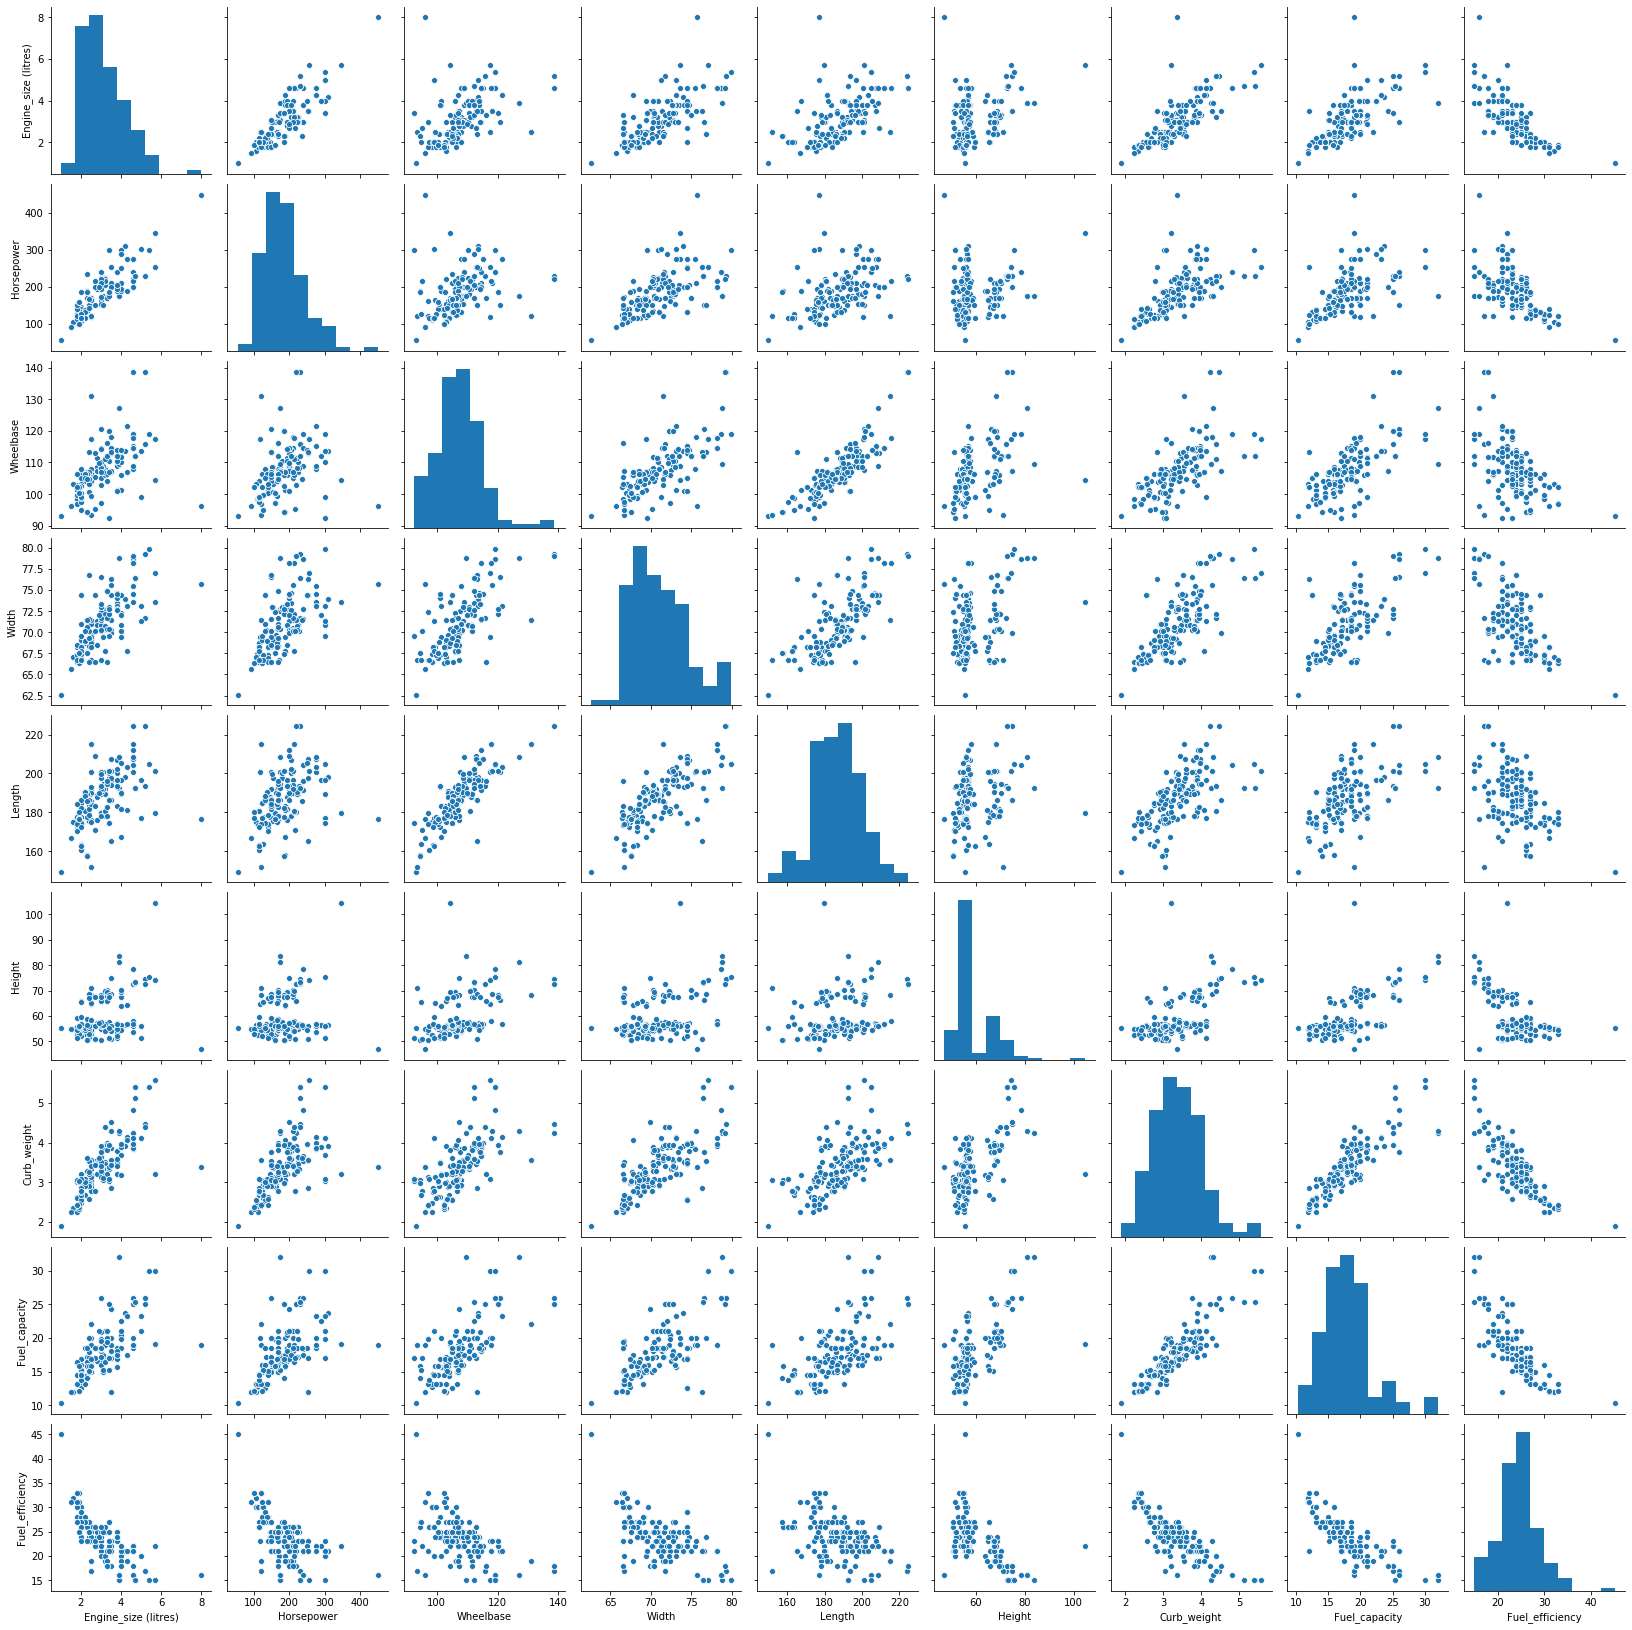

In [13]:
sns.pairplot(df_clus)

Using seaborn.pairplot(), all possible variables pairs are plotted. This is so that patterns are found easily and the clustering inputs can be chosen more accurately instead of using self intuition to choose the inputs. There are many interesting plots in this picture, including the graph of height against horsepower. Therefore, horsepower and height will be chosen as the clustering inputs. 

Text(0, 0.5, 'Height')

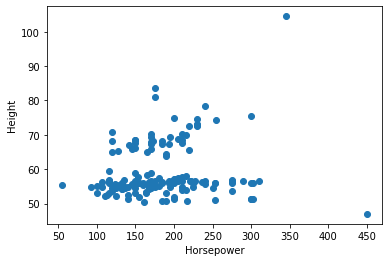

In [14]:
plt.scatter(x=df_clus['Horsepower'],y=df_clus['Height'])
plt.xlabel('Horsepower')
plt.ylabel('Height')

Based on the observation, there are 2 obvious outliers. Therefore, they need to be removed in order to ensure the clustering output is more reliable.

In [15]:
# Removing outliers
df_clus = df_clus[df_clus['Horsepower'] < 330]

Text(0, 0.5, 'Height')

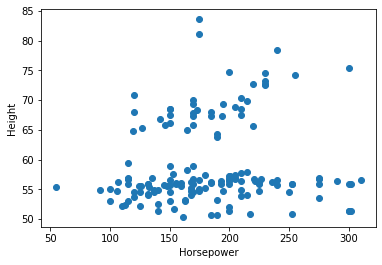

In [16]:
plt.scatter(x=df_clus['Horsepower'],y=df_clus['Height'])
plt.xlabel('Horsepower')
plt.ylabel('Height')

After removing outliers, the graph is shown above.

In [17]:
kmeans = KMeans(n_clusters=2).fit( 
        df_clus[['Horsepower','Height']])

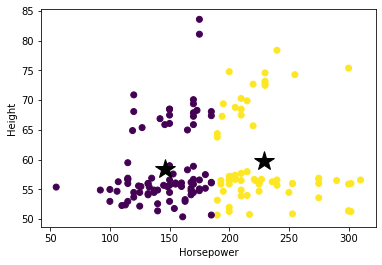

In [18]:
# Visualise the output labels
colormap = np.array(['r','g','b'])
plt.scatter(
    x=df_clus['Horsepower'],
    y=df_clus['Height'],
    c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Horsepower')
plt.ylabel('Height')
plt.show()

**k = 2** 

Looking at the clustering output above, it shows obvious seperation in an imaginary line of horsepower of roughly 175W. Since k is 2, there are only 2 categories of clustering output.

In [19]:
kmeans = KMeans(n_clusters=5).fit( 
        df_clus[['Horsepower','Height']])

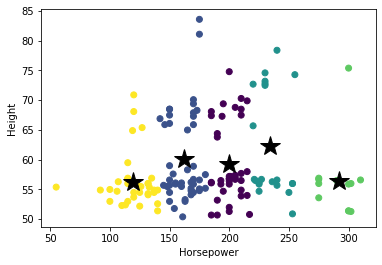

In [20]:
# Visualise the output labels
plt.scatter(
    x=df_clus['Horsepower'],
    y=df_clus['Height'],
    c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Horsepower')
plt.ylabel('Height')
plt.show()

**k = 5** 

Looking at the clustering output above, there are 5 categories since k is 5. In this graph, it shows more detailed clustered outputs. Based on the observations on the cluster centroids, there are groups with roughly horsepower mean of 125, 160, 200, 225 and 275 measured in watts. 

In [21]:
kmeans = KMeans(n_clusters=7).fit( 
        df_clus[['Horsepower','Height']])

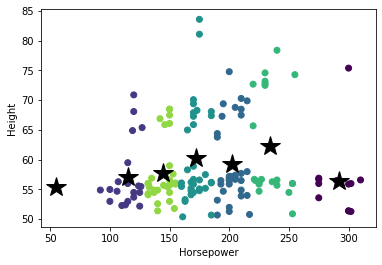

In [22]:
# Visualise the output labels
plt.scatter(
    x=df_clus['Horsepower'],
    y=df_clus['Height'],
    c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Horsepower')
plt.ylabel('Height')
plt.show()

**k = 7** 

Looking at the clustering output above, there are 7 categories since k is 7. In this graph, the difference between distances of cluster centroids are more closely packed. However, one of the cluster centroids on the left side are only grouping 1 data point. This might indicate that the k input is too large, or that particular data point.

# Classification

Classification is a type of supervised learning method. Classification is the process of predicting the results in a discrete input. There are 2 types of classification which are binary classification and multi-class classification. One of the common use of classification is spam detection in email service. 

## What is Supervised Learning?
Supervised learning is a type of machine learning method where the model is getting trained on a labelled dataset. This means the dataset has both input and output parameters. Supervised learning algorithm is trained on a dataset and produces a function which can be used to map out new examples. 

## Difference between Binary Classification and Multi-class Classification
BInary classification is a type of classification which classifies elements of a given set into 2 seperate groups. For example, we can classify a patient whether the person has been infected with COVID-19. The resulting output can only be "Yes" or "No". 

Multi-class classification is a type of classification which classifies elements of a given set into multiple groups. FOr example, we can classify fruits into apple, orange, kiwi, mango and so on. Generally, multi-class classification is more complex than binary classification because there are more possible resulting outputs. 

## Labelled Data
Labelled data is compulsary for classification. Labelled data is basically a group of samples which has one or more labels. For example, the labels might indicate that whether a photo consists of a human or a dog. When a labelled dataset is obtained, machine learning models can be trained and be applied so that when new unlabelled data can be labelled and predicted. 

## Training and Test Datasets
When a wrangled dataset is obtained, the dataset needs to be splitted into training and test datasets in order to carry out modelling process. 

Training dataset - Data sample which is used to fit machine learning model 

Test dataset - Data sample used to provide evaluation of trained machine learning model which is unbiased 

Training dataset is generally larget than test dataset because this gives the algorithm a higher probabiliy to understand the patterns in the dataset. The more data samples are fitted into the machine learning model, the more likely machine learning model can recognize patterns and predict more accurate results. 

## Binary Classification

### Labelled Data: US_vehicle_type

In [23]:
# Convert 'Car' to 1 and 'Passenger' to 0 
df['US_vehicle_type'] = np.where(df['US_vehicle_type'].values == 'Car', 1,0)

In [24]:
# Choosing x and y variables
X = df.iloc[:,[8,10]].values #Width and Height 
y = df.iloc[:, 4].values

In [25]:
# Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [26]:
# Feature Scaling - normalization 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Fitting Decision Tree classifier onto training dataset
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
# Predict test set results 
y_pred = classifier.predict(X_test)

In [29]:
# Create a list consisting columns which are ID and Predicted
lst = []
count = 1
for i in y_pred:
    if i == 1: 
        lst.append([count,'Car'])
    else: 
        lst.append([count,'Passenger'])
    count += 1

In [30]:
# Writing the predicted result to a CSV file
import csv 
with open('30883490_NgWeiHan_US_Vehicle_Type.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID","Predicted"])
    writer.writerows(lst)

Text(69.0, 0.5, 'Truth')

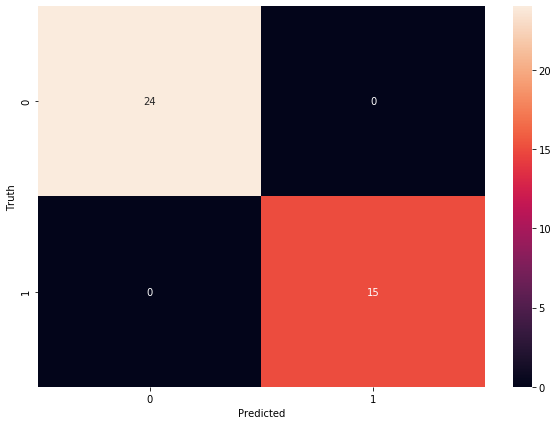

In [31]:
# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
# Creating a classification report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        15

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



As seen by the confusion matrix and classification report, the model has achieved 100% accuracy rate which is unusual in normal cases. However, since the dataset used is relatively small, it is clear through the variables and it should be easy to classify them.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


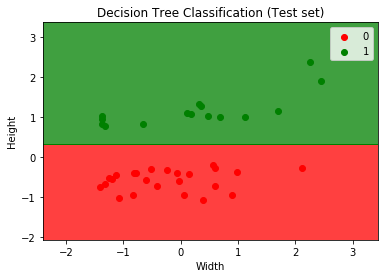

In [33]:
# Visualizing the Test set results
X_set, y_set = X_test,y_test 
X1, X2 = np.meshgrid(np.arange
                    (start = X_set[:,0].min()-1,
                    stop = X_set[:,0].max()+1,
                    step = 0.01), 
                    np.arange 
                    (start = X_set[:,1].min()-1,
                    stop=X_set[:,1].max()+1,
                    step = 0.01)) 

plt.contourf(
    X1,
    X2,
    classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
    X_set[y_set == j, 0],
    X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i),
    label = j
    )
    
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.show()

**1 - Car** 

**0 - Passenger** 

In this graph, we can see that both categories can be easily seperated by a single line. Therefore, there are obvious distinctions between the variables which make the classifier easy to predict. In this case, vehicles with roughly lower average height is classified as Passenger while vehicles with higher average height is classified as Car.

## Multi-Class Classification

### Labelled Data: Vehicle_class 

In [34]:
# Splitting x and y variables 
X = df_cls.iloc[:,[5,6,7,8]].values 
y = df_cls.iloc[:,1].values 
X_test_real = df_cls_test.iloc[:,[4,5,6,7]].values

In [35]:
# Splitting training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [36]:
# Feature Scaling - Normalization
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test_real = sc.transform(X_test_real)

In [37]:
# Fitting Decision Tree Classifier onto training dataset 
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
# Predicting the result 
y_pred = classifier.predict(X_test)

In [39]:
# Creating a list consists of columns ID and Predicted
lst = []
count = 1
for i in y_pred: 
    lst.append([count,i])
    count += 1

In [40]:
# Writing to a csv file
with open('30883490-NgWeiHan-VehicleClass.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID","Predicted"])
    writer.writerows(lst)

Text(69.0, 0.5, 'Truth')

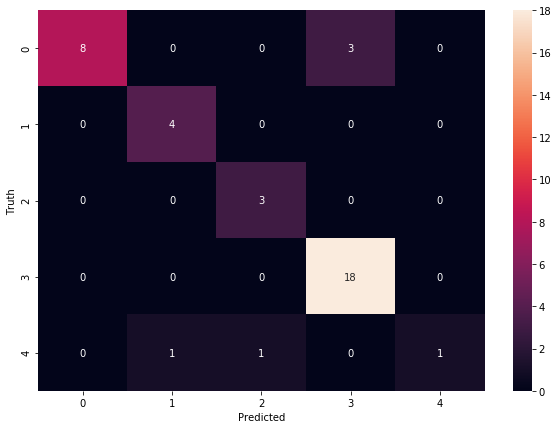

In [41]:
# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
# Creating a classification report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       Coupe       1.00      0.73      0.84        11
         MPV       0.80      1.00      0.89         4
         SUV       0.75      1.00      0.86         3
       Sedan       0.86      1.00      0.92        18
       Truck       1.00      0.33      0.50         3

    accuracy                           0.87        39
   macro avg       0.88      0.81      0.80        39
weighted avg       0.89      0.87      0.86        39



On the confusion matrix, the diagonal from top left to bottom right indicates true positives. When we take the number of true positives (34) and divide by total samples (39), the accuracy rate is 87%. Looking at the accuracy rate of this model from the classification report, the accuracy rate is 87% as well. Therefore, this model is decent at predicting vehicle class. 

C:\Users\Han\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Han\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


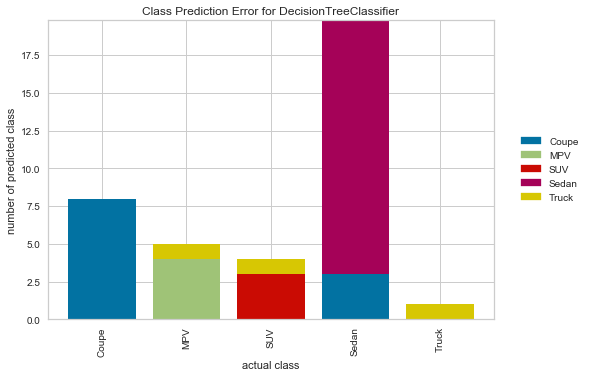

<Figure size 2880x2880 with 0 Axes>

In [44]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(classifier)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.figure(figsize=(40,40))
visualizer.show()

Shown by the class prediction error graph, it shows when a class is predicted, how accurate is the model to predict the right class. When coupe and truck are predicted, both of them have 100% precision rate.

In [45]:
# Predicting for kaggle competition
y_pred_real = classifier.predict(X_test_real)

In [46]:
# Create a list consists of columns ID and Predicted
lst = []
count = 1
for i in y_pred_real: 
    lst.append([count,i])
    count += 1

In [47]:
# Write to a csv file
with open('30883490-NgWeiHan-Version5.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID","Predicted"])
    writer.writerows(lst)

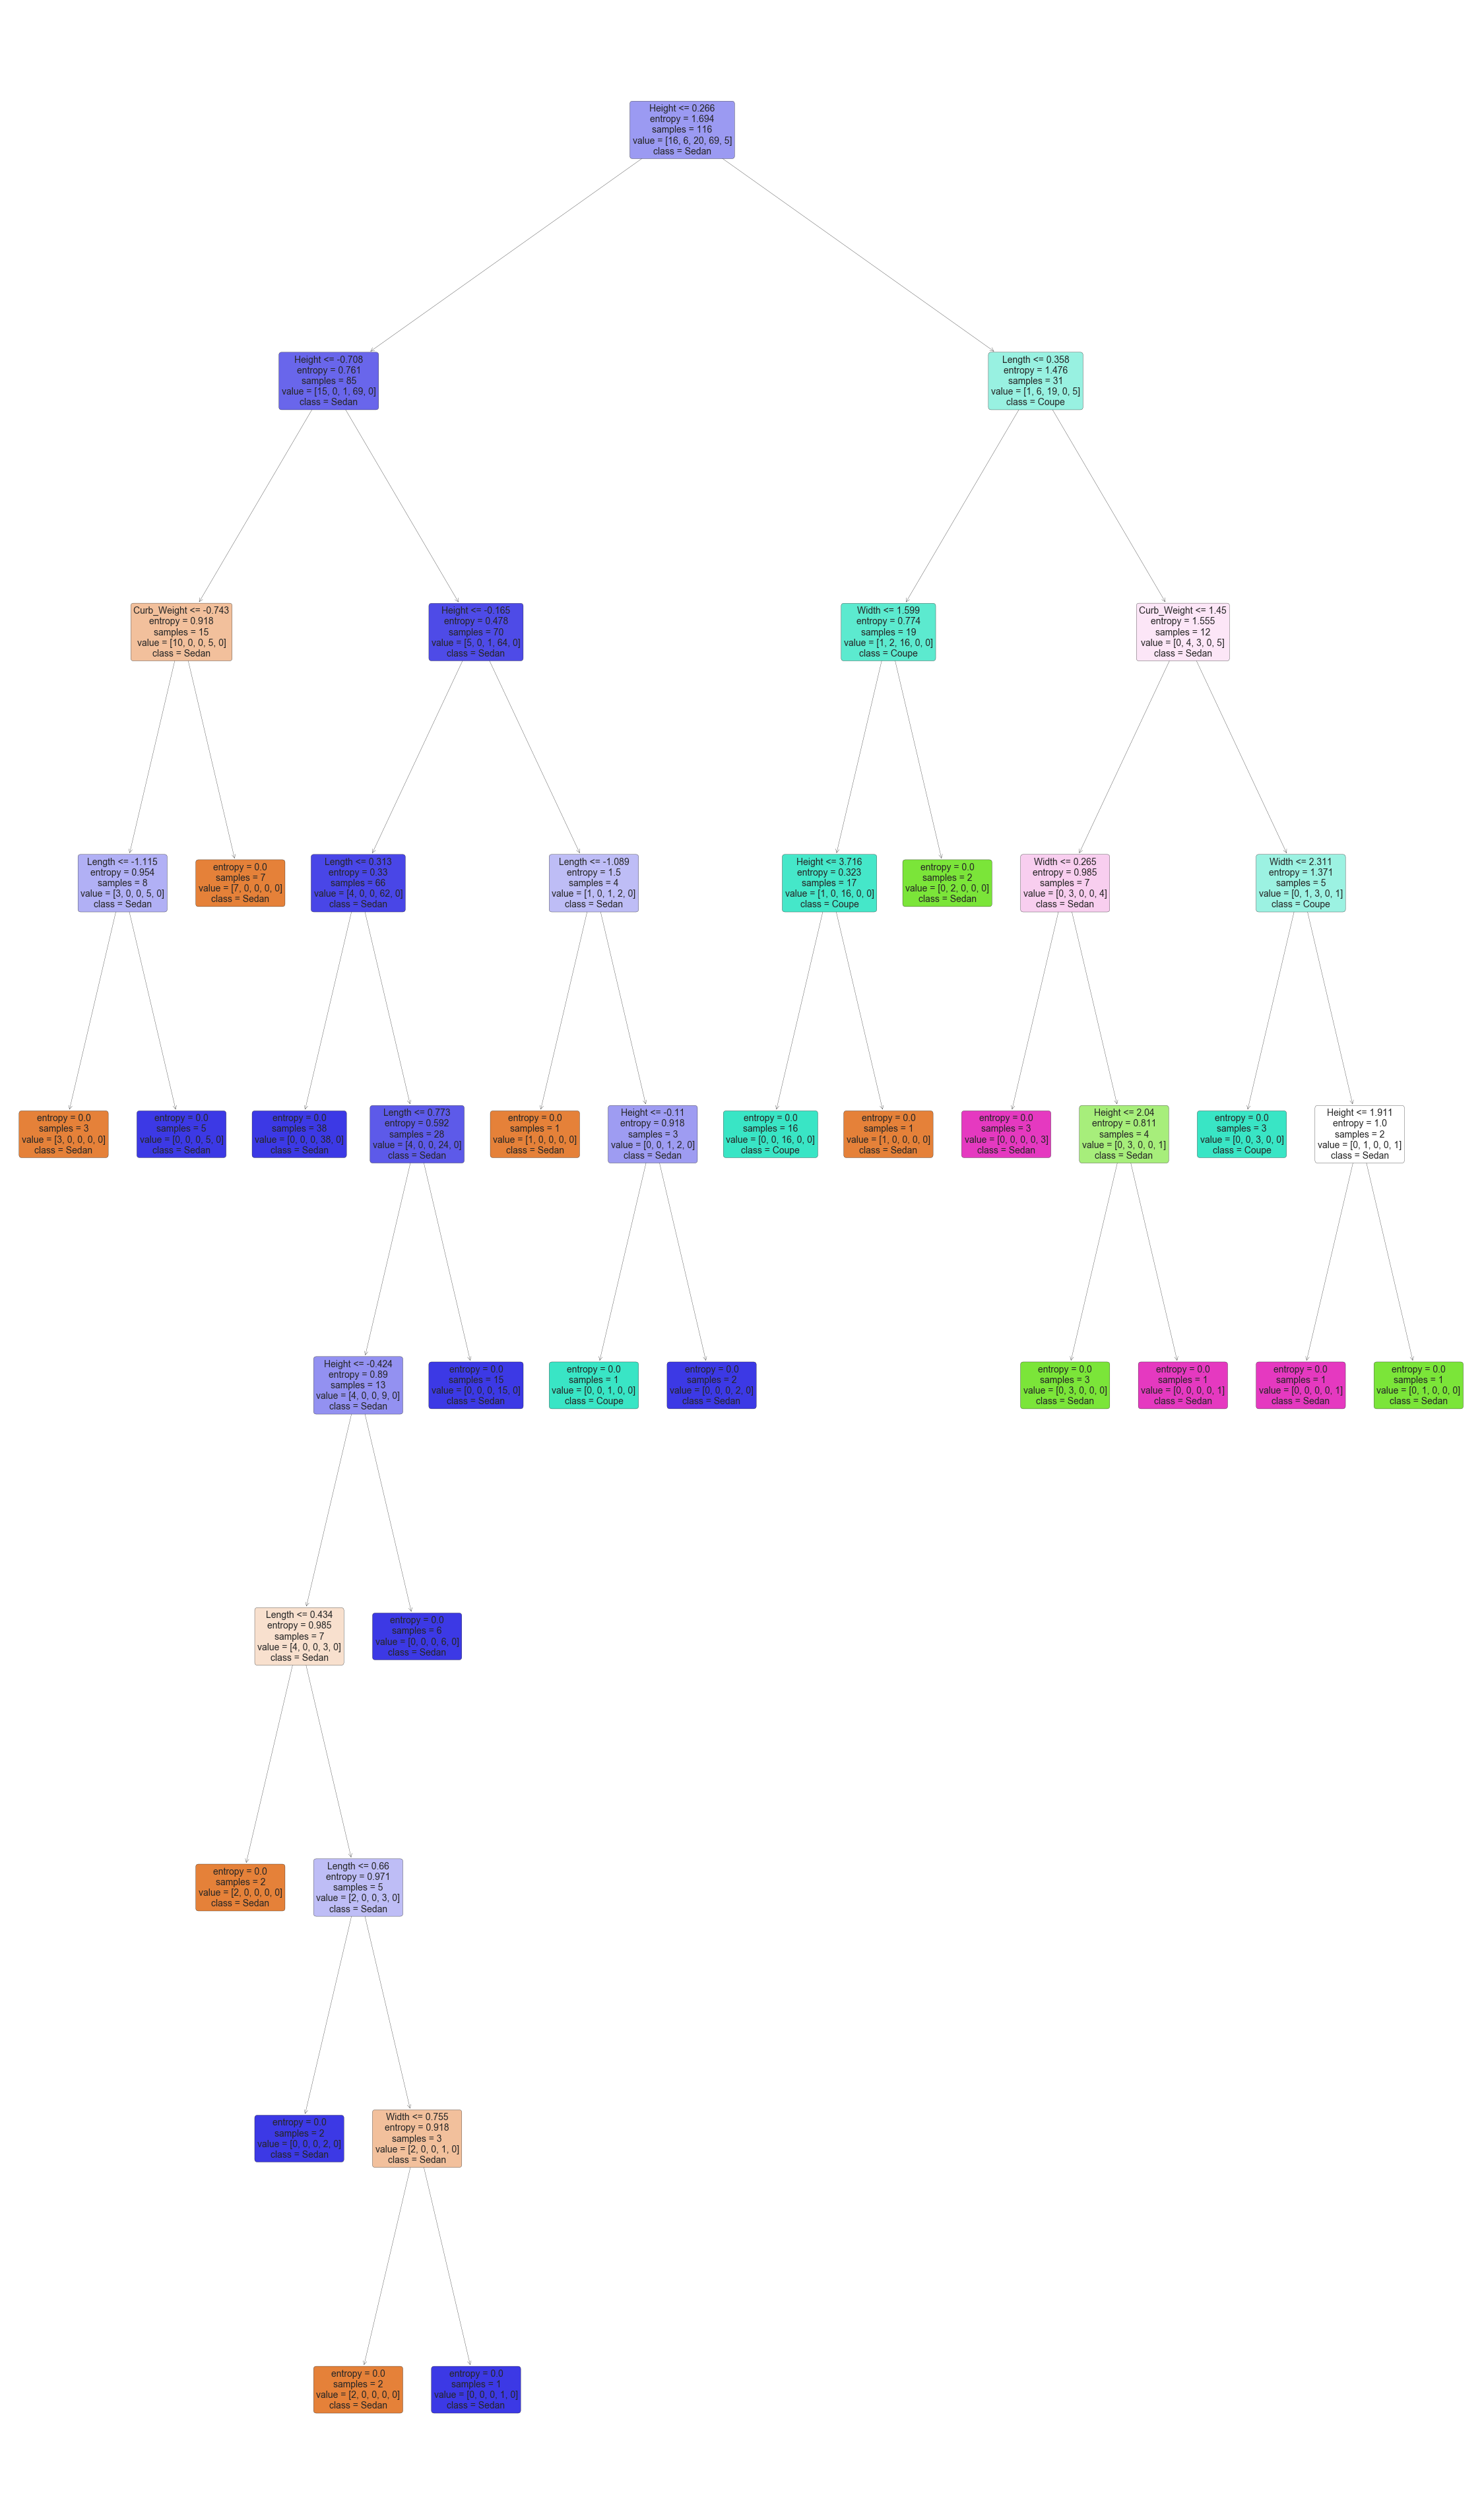

In [48]:
# Visualizing the decision tree
classifier.fit(X_train, y_train)
plt.figure(figsize=(40,70))
a = tree.plot_tree(classifier, 
              feature_names=['Width','Length','Height','Curb_Weight'], 
              class_names=y_train, 
              filled=True, 
              rounded=True, 
              fontsize=14)

This decison tree visualization shows how the algorithm recursively partition the feature space into regions, which groups similar instances together.

### Labelled Data: Vehicle_alt_class

In [51]:
# Splitting into x and y variables
X = df.iloc[:,[5,9,10]].values
y = df.iloc[:,3].values

In [52]:
# Splitting into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [53]:
# Feature Scaling - Normalization
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# Fitting Decision Tree Classifier onto training dataset
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [55]:
# Predicting the results
y_pred = classifier.predict(X_test)

In [56]:
# Create a list consists of columns ID and predicted
lst = []
count = 1
for i in y_pred: 
    lst.append([count,i])
    count += 1

In [57]:
with open('30883490-NgWeiHan-VehicleAltClass.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID","Predicted"])
    writer.writerows(lst)

Text(70.0, 0.5, 'Truth')

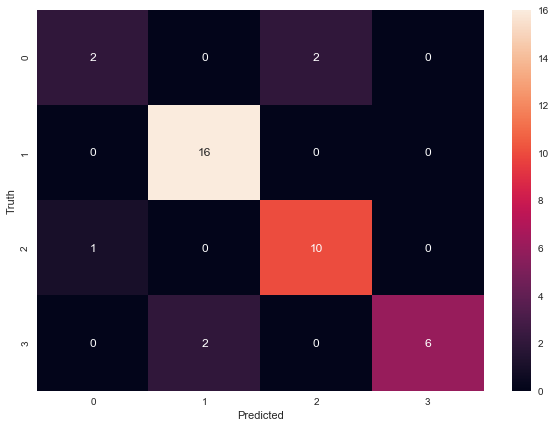

In [58]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       Cargo       0.67      0.50      0.57         4
       Hatch       0.89      1.00      0.94        16
         SUV       0.83      0.91      0.87        11
      Sports       1.00      0.75      0.86         8

    accuracy                           0.87        39
   macro avg       0.85      0.79      0.81        39
weighted avg       0.87      0.87      0.87        39



Shown by the classification report, the accuracy rate of this model is 87%. However, Cargo has a relatively lower precision as compared to the rest. This means that when Cargo is predicted as a value, it is less likely to be correct as compared to the rest. 

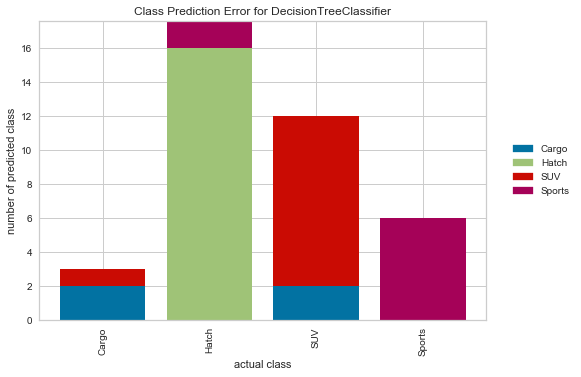

<Figure size 2880x2880 with 0 Axes>

In [60]:
visualizer = ClassPredictionError(classifier)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.figure(figsize=(40,40))
visualizer.show()

As shown by the graph, when sports type of car is predicted, it has 100% precision rate. 

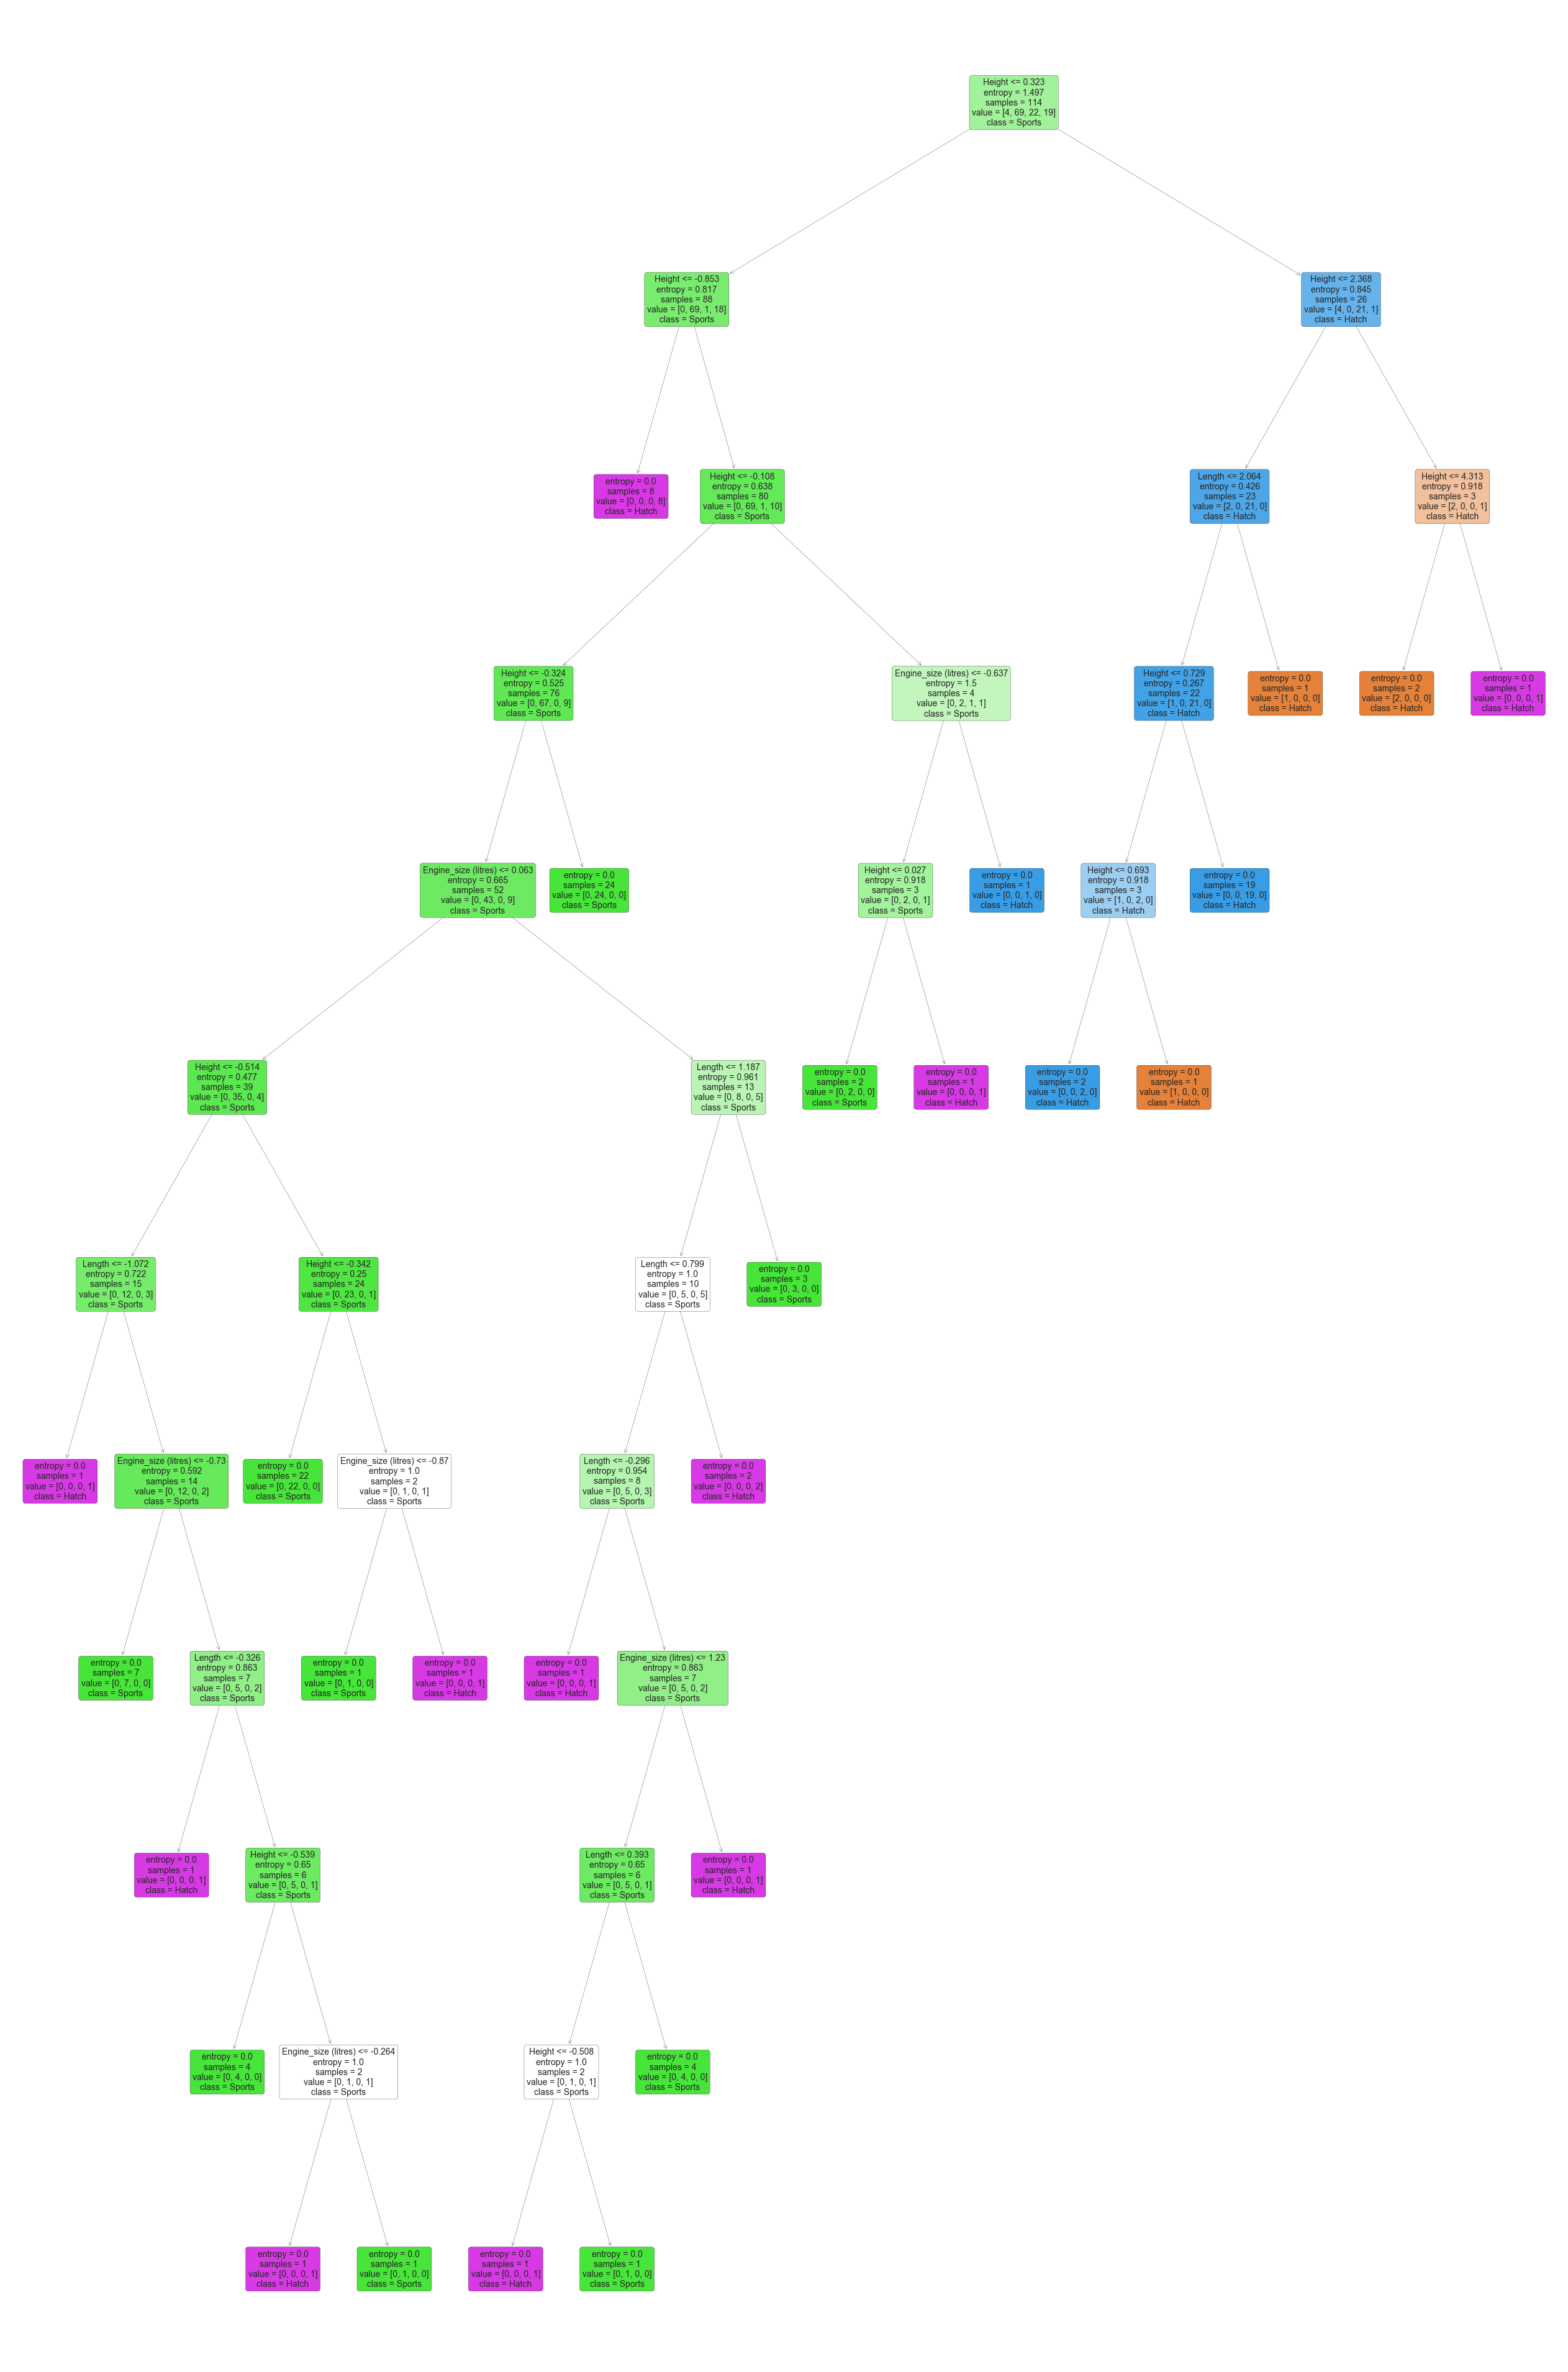

In [61]:
# Visualizing the decison tree
classifier.fit(X_train, y_train)
plt.figure(figsize=(45,70))
a = tree.plot_tree(classifier, 
              feature_names=['Engine_size (litres)','Length','Height'],
              class_names=y_train, 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Random Forest Algorithm

In [62]:
# Splitting into x and y variables
X = df_cls.iloc[:,[5,6,7,8]].values 
y = df_cls.iloc[:,1].values 

In [63]:
# Splitting into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [64]:
# Feature Scaling - Normalization
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(
    n_estimators = 20,
    criterion = 'entropy',
    random_state = 0
    )
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
# Predicting the result
y_pred = classifier.predict(X_test)

In [67]:
# Creating list with columns ID and predicited
lst = []
count = 1
for i in y_pred: 
    lst.append([count,i])
    count += 1

In [68]:
# Write to a csv file
with open('30883490-NgWeiHan-RandomForest.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID","Predicted"])
    writer.writerows(lst)

Text(70.0, 0.5, 'Truth')

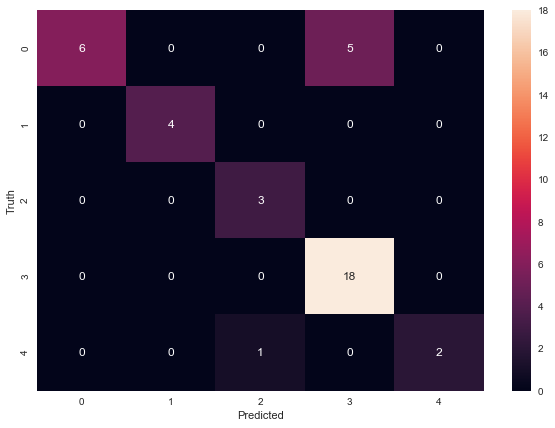

In [69]:
# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
# Creating a classification report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       Coupe       1.00      0.55      0.71        11
         MPV       1.00      1.00      1.00         4
         SUV       0.75      1.00      0.86         3
       Sedan       0.78      1.00      0.88        18
       Truck       1.00      0.67      0.80         3

    accuracy                           0.85        39
   macro avg       0.91      0.84      0.85        39
weighted avg       0.88      0.85      0.83        39



Comparing the accuracy rate of Random Forest algorithm to Decision Tree algorithm, Random Forest model has 2% lower accuracy rate than the Decision Tree model. Therefore, Decision Tree model will be used as a better model to predict the vehicle class results.

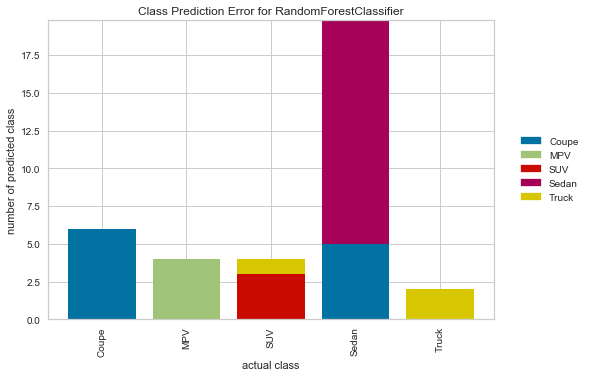

<Figure size 2880x2880 with 0 Axes>

In [71]:
visualizer = ClassPredictionError(classifier)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.figure(figsize=(40,40))
visualizer.show()

However, when we look at the class prediction error graph, Coupe, MPV and Truck have 100% precision rate. This means that when it comes to predicting these 3 classes, they are better than Decision Tree classifier.

# Conclusion

In conclusion, this report has shown proper steps to wrangle and describe the data, clustering, classifying, predicting and creating proper analysis for each sections. Due to the smaller sizes of dataset, the models created might not be useful when it comes to real life situation. However, it is shown that the algorithms used for clustering and classification such as K-means clustering, Decision Tree and Random Forest can give a decent predicting results. Therefore, to further improve the result, more data should be gathered and wrangled in order to make better and more useful model.